In [3]:
import graphlab
graphlab.set_runtime_config('GRAPHLAB_DEFAULT_NUM_PYLAMBDA_WORKERS', 4)

/opt/conda/lib/python2.7/site-packages/requests/packages/urllib3/connection.py:266: SubjectAltNameWarning: Certificate for beta.graphlab.com has no `subjectAltName`, falling back to check for a `commonName` for now. This feature is being removed by major browsers and deprecated by RFC 2818. (See https://github.com/shazow/urllib3/issues/497 for details.)
  SubjectAltNameWarning
[INFO] graphlab.cython.cy_server: GraphLab Create v2.1 started. Logging: /tmp/graphlab_server_1481224366.log


This non-commercial license of GraphLab Create for academic use is assigned to junkal2002@yahoo.com and will expire on December 08, 2017.


In [4]:
sales = graphlab.SFrame('./data/kc_house_data.csv/')

# Simple data exploratory

In [5]:
sales

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
7129300520,2014-10-13 00:00:00+00:00,221900,3,1,1180,5650,1,0
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
5631500400,2015-02-25 00:00:00+00:00,180000,2,1,770,10000,1,0
2487200875,2014-12-09 00:00:00+00:00,604000,4,3,1960,5000,1,0
1954400510,2015-02-18 00:00:00+00:00,510000,3,2,1680,8080,1,0
7237550310,2014-05-12 00:00:00+00:00,1225000,4,4.5,5420,101930,1,0
1321400060,2014-06-27 00:00:00+00:00,257500,3,2.25,1715,6819,2,0
2008000270,2015-01-15 00:00:00+00:00,291850,3,1.5,1060,9711,1,0
2414600126,2015-04-15 00:00:00+00:00,229500,3,1,1780,7470,1,0
3793500160,2015-03-12 00:00:00+00:00,323000,3,2.5,1890,6560,2,0


In [6]:
graphlab.canvas.set_target('ipynb')
sales.show(view="Scatter Plot", x="sqft_living", y="price")

# Exploring the most expensive neighbourhood

Get the average price of the most expensive neighbourhood.

In [7]:
# 1. Selection and summary statistics: discover which neighborhood (zip code) of Seattle has the highest average house sale price
sales.show(view='BoxWhisker Plot', x='zipcode', y='price')

In [13]:
# take the sales data, select only the houses with this zip code, and compute the average price.
# Save this result to answer the quiz at the end.
houses_at_98039 = sales[sales['zipcode']=='98039']
houses_at_98039

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
3625049014,2014-08-29 00:00:00+00:00,2950000,4,3.5,4860,23885,2,0
2540700110,2015-02-12 00:00:00+00:00,1905000,4,3.5,4210,18564,2,0
3262300940,2014-11-07 00:00:00+00:00,875000,3,1,1220,8119,1,0
3262300940,2015-02-10 00:00:00+00:00,940000,3,1,1220,8119,1,0
6447300265,2014-10-14 00:00:00+00:00,4000000,4,5.5,7080,16573,2,0
2470100110,2014-08-04 00:00:00+00:00,5570000,5,5.75,9200,35069,2,0
2210500019,2015-03-24 00:00:00+00:00,937500,3,1,1320,8500,1,0
6447300345,2015-04-06 00:00:00+00:00,1160000,4,3,2680,15438,2,0
6447300225,2014-11-06 00:00:00+00:00,1880000,3,2.75,2620,17919,1,0
2525049148,2014-10-07 00:00:00+00:00,3418800,5,5,5450,20412,2,0


In [15]:
houses_at_98039['price'].mean()
# First answer to quiz question

2160606.5999999996

# Find the percentage of houses with living space between 2000 and 4000

In [48]:
#first select the houses that have ‘sqft_living’ higher than 2000 sqft but no larger than 4000 sqft.
#What fraction of the all houses have ‘sqft_living’ in this range? 
house_size = sales[(sales['sqft_living'] > 2000) & (sales['sqft_living'] <= 4000)]
house_size

id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront
6414100192,2014-12-09 00:00:00+00:00,538000,3,2.25,2570,7242,2,0
1736800520,2015-04-03 00:00:00+00:00,662500,3,2.5,3560,9796,1,0
9297300055,2015-01-24 00:00:00+00:00,650000,4,3,2950,5000,2,0
2524049179,2014-08-26 00:00:00+00:00,2000000,3,2.75,3050,44867,1,0
7137970340,2014-07-03 00:00:00+00:00,285000,5,2.5,2270,6300,2,0
3814700200,2014-11-20 00:00:00+00:00,329000,3,2.25,2450,6500,2,0
1794500383,2014-06-26 00:00:00+00:00,937000,3,1.75,2450,2691,2,0
1873100390,2015-03-02 00:00:00+00:00,719000,4,2.5,2570,7173,2,0
8562750320,2014-11-10 00:00:00+00:00,580500,3,2.5,2320,3980,2,0
0461000390,2014-06-24 00:00:00+00:00,687500,4,1.75,2330,5000,1.5,0


In [49]:
#python 2.7
print (float(len(house_size)) / len(sales))

#python 3
#print (len(house_size)) / len(sales)

0.421875722945


# Predict the house price

Split the data set into training set and test set, using a ratio of 80%-20%.

In [44]:
train_data,test_data = sales.random_split(.8,seed=0)

In [50]:
my_features = ['bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode']

In [51]:
advanced_features = \
[ 
'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'zipcode', \
'condition', # condition of house				 
'grade', # measure of quality of construction				
'waterfront', # waterfront property				
'view', # type of view				
'sqft_above', # square feet above ground				
'sqft_basement', # square feet in basement				
'yr_built', # the year built				
'yr_renovated', # the year renovated				
'lat', 'long', # the lat-long of the parcel				
'sqft_living15', # average sq.ft. of 15 nearest neighbors 				
'sqft_lot15', # average lot size of 15 nearest neighbors 
]

Regression model using a base set of feature

In [53]:
my_features_model = graphlab.linear_regression.create(train_data,target='price',features=my_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 6

Number of unpacked features : 6

Number of coefficients    : 115

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.113449     | 3763208.270524     | 181908.848367 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

Regression model using advanced set of feature.

In [54]:
advanced_features_model = graphlab.linear_regression.create(train_data,target='price',features=advanced_features,validation_set=None)

Linear regression:

--------------------------------------------------------

Number of examples          : 17384

Number of features          : 18

Number of unpacked features : 18

Number of coefficients    : 127

Starting Newton Method

--------------------------------------------------------

+-----------+----------+--------------+--------------------+---------------+

| Iteration | Passes   | Elapsed Time | Training-max_error | Training-rmse |

+-----------+----------+--------------+--------------------+---------------+

| 1         | 2        | 0.107078     | 3469012.450663     | 154580.940735 |

+-----------+----------+--------------+--------------------+---------------+

SUCCESS: Optimal solution found.

In [60]:
my_features_model_results =  my_features_model.evaluate(test_data)
advanced_feature_results = advanced_features_model.evaluate(test_data)
print(my_features_model_results)
print(advanced_feature_results)

{'max_error': 3486584.509381928, 'rmse': 179542.43331269105}
{'max_error': 3556849.413848093, 'rmse': 156831.11680191013}


In [63]:
import matplotlib.pyplot as plt
%matplotlib inline

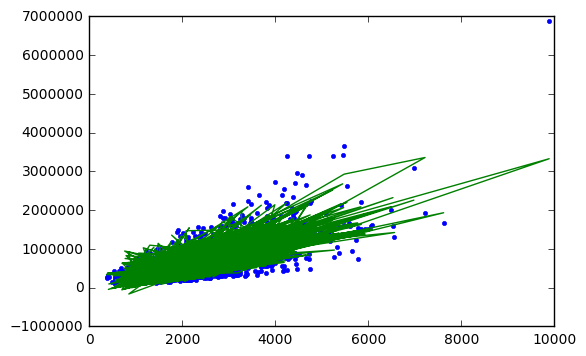

In [66]:
plt.plot(test_data['sqft_living'],test_data['price'],'.',
        test_data['sqft_living'],advanced_features_model.predict(test_data),'-')

In [68]:
print my_features_model_results['rmse'] - advanced_feature_results['rmse']

22711.3165108
